# X-ray challenge

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

# Baseline model

Number of images per group

- Normal : 1443 images
- Bacterial Pneumonia : 2727 images 
- Viral Pneumonia : 1512 images 
- COVID-19 : 980 images

In [1]:
980+1512+2727+ 1443

6662

In [2]:
980/6662

0.1471029720804563

In [3]:
1512/6662

0.2269588712098469

In [4]:
2727/6662

0.4093365355749024

In [5]:
1443/6662

0.21660162113479436

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({'lab':['N', 'B','V','C'], 'val':[1443, 2727, 1512, 980],'%':[22, 41, 23, 15]}) 

In [8]:
df

,lab,val,%
0,N,1443,22
1,B,2727,41
2,V,1512,23
3,C,980,15


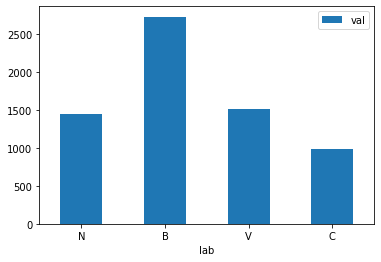

In [15]:
ax = df.plot.bar(x='lab', y='val', rot=0)

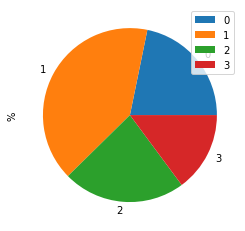

In [13]:
 ax = df.plot.pie(x='lab', y='%', rot=0, legend = 'lab')


If you were always counting the majority score from the entire

Y = 2727      
N = 3935          

Majority =  2727 /(2727+3935) = 0.41


Baseline accuracy = 41%

# Data exploration

Images within folders had differing dimensions and sizes locally:

-  X_viral : 215 of 1512(14% dataset) have 3 vs 2 dimensions, 215 have sizes of 916608 vs  65536(256x256))

- X_bacterial : 412 of 2727 (15.1% dataset) have 3 vs 2 dimensions,  have sizes of 916608 vs  65536(256x256))

- X_covid : 153  of 980 (15,6% dataset) have 3 vs 2 dimensions,  have sizes of 916608 vs  65536(256x256))

- X_normal : 48 of 1443 (3.3% dataset) have 3 vs 2 dimensions, 215 have sizes of 916608 vs  65536(256x256))

# Data preprocessing

## Locally

- to begin with drop all images with dim of 3 and different size to 65536 
- concatenating the dataset
- One- hot encode categories (y)
- Normalization (x) 255  [0-1]
- split train/test/val set

To do: 

- reshape dim of 3 and different size to 65536
- concatenating the dataset
- split train/test/val set

## Google Colab

- Train and Test set was split manually
- Train and validation set was split by the method : tf.keras.preprocessing.image_dataset_from_directory
- Normalization of train and val ds

# Modelling Approaches

## Locally

To do: 

- train model

## Google Colab

1st

num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.fit(normalized_train_ds,
          batch_size=32,
          epochs=100,
          validation_data=normalized_val_ds,
          callbacks=[es])

52s 373ms/step - loss: 0.3546 - accuracy: 0.8389 - val_loss: 0.5709 - val_accuracy: 0.7977

from tensorflow.keras import models

models.save_model(model, '/content/drive/MyDrive/models/my_model')

## Ideas To improve model: 

- look at loss function of val and trainset and look at accuracy while training 

- try transfer learning: from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model
- data augmentation

-  grid search on all the hyper-parameters: learning_rate, batch_size, data augmentation etc




Questions:
1. Should we think about data balancing ?
2. Next step - use a transfer learning model ?
3. Should we think of padding?
4. Should we think of data augmentation ?
5. Tune hyperparameters?

